In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GMM
import scipy.stats
%matplotlib inline

If we think of neural networks as the ultimate method to model a function, then the ultimate method to model density would be through Gaussian Mixture Models. 

GMMs are similar to K-Means. Instead of centroids from K-Means, a GMM cluster is a Gaussian and weighted by priors.

This notebook is a simple example of GMM applied on the Iris dataset.

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target
n_classes = len(np.unique(Y))
print X.shape, Y.shape
print "Iris has %d unique classes" % (n_classes)

(150, 2) (150,)
Iris has 3 unique classes


We will now fit a GMM of 3 components with spherical covariance, which just means that the covariance matrix is a diagonal matrix with tied weights.

The GMM converges via Expecation Maximization, a coordinate descent method. 

Note: K-Means also converges via coordinate descent. 

In [3]:
gmm = GMM(n_components=3, covariance_type='spherical', verbose=1)
gmm.means = np.array([X[Y == i].mean(axis=0) for i in xrange(n_classes)])
print "initialized means to " + str(gmm.means)
res = gmm.fit(X)
print "\n\n %s \n\n" % (str(res))
print "weights are" + str(gmm.weights_)
print "means are" + str(gmm.means_)
print "convariance matrix is " + str(gmm.covars_)

initialized means to [[ 5.006  3.418]
 [ 5.936  2.77 ]
 [ 6.588  2.974]]
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
	EM iteration 8
	EM iteration 9
	EM iteration 10
	EM iteration 11
		EM algorithm converged.


 GMM(covariance_type='spherical', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=1) 


weights are[ 0.31747882  0.26274873  0.41977245]
means are[[ 5.99140486  2.77107632]
 [ 6.87395421  3.07555669]
 [ 5.08624721  3.25448548]]
convariance matrix is [[ 0.0918648   0.0918648 ]
 [ 0.14850676  0.14850676]
 [ 0.19587191  0.19587191]]


/Users/jason.xie/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


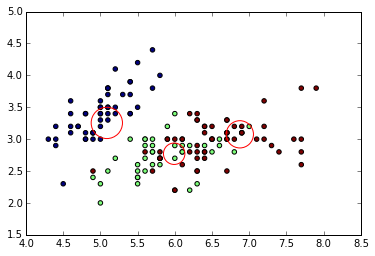

In [4]:
fig, ax = plt.subplots(1,1, sharey=True)
ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.scatter(gmm.means_[0][0], gmm.means_[0][1], s=5000 * gmm.covars_[0][0], facecolors='none', edgecolors='r')
ax.scatter(gmm.means_[1][0], gmm.means_[1][1], s=5000 * gmm.covars_[1][0], facecolors='none', edgecolors='r')
ax.scatter(gmm.means_[2][0], gmm.means_[2][1], s=5000 * gmm.covars_[2][0], facecolors='none', edgecolors='r')

Given a datapoint, we can model the likelihood or pdf. 

In [5]:
example = X[0]
print "Let's take an example: %s" % (str(example))
prob_for_each_cluster = np.array([
        scipy.stats.multivariate_normal.pdf(example, mean=gmm.means_[i], cov=np.diag(gmm.covars_[i]))
        for i in range(3)])
print "Its probability for each cluster is %s" % (str(prob_for_each_cluster))
prob_example = gmm.weights_.dot(prob_for_each_cluster)
print "Its weighted probability is %f" % (prob_example)

Let's take an example: [ 5.1  3.5]
Its probability for each cluster is [  1.27195645e-03   1.46293047e-05   6.96327692e-01]
Its weighted probability is 0.292707


Similarly, we can sample from the GMM, because it is a generative model.

In [6]:
gmm.sample(5)

array([[ 5.75265248,  2.97568727],
       [ 5.52249408,  2.47148347],
       [ 6.12821276,  2.10229956],
       [ 5.53108186,  3.02607601],
       [ 5.23608122,  3.37813372]])